# **SKKU Deep Learning (Spring 2023)**
### Useful Python Libraries (Lab2 for Week 3)

**NOTE**
Some descriptions & codes from the below resources:
1. cs231n lecture at Stanford Univ.
2. https://cs231n.github.io/python-numpy-tutorial/
2. https://neptune.ai/blog/pil-image-tutorial-for-machine-learning
3. http://scipy-lectures.org/intro/numpy/operations.html (It has the best figure about Numpy broadcasting!)
----


##1. Numpy 

Numpy is the core library for scientific computing in Python.

It provides a high-performance multidimensional array object, and tools for working with these arrays.

If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

### Numpy Array

A numpy array is a grid of values, all of the *same type*, and is indexed by a tuple of nonnegative integers.

The number of dimensions is the **rank** of the array; the shape of an array is a **tuple** of integers giving the size of the array along each dimension.

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
b = [1,2,3] # Python list

print(type(a),type(b), a.shape, a[0], a[1], a[2], b[0], b[1], b[2])

# Change an element of the array
a[0] = 41
#a[0] = 'hello'                
#b[0] = 'hello'

print(a)
print(b)

<class 'numpy.ndarray'> <class 'list'> (3,) 1 2 3 1 2 3
[41  2  3]
[1, 2, 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)
print(b.shape) # (2,3)
print(b[0, 0], b[0, 1], b[1, 1])

[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 5


Numpy also provides many functions to create arrays:

In [4]:
a = np.zeros((3,5))  # Create an array of all zeros
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [5]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [6]:
c = np.full((5,2), 3.14) # Create a constant array
print(c)

[[3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]]


In [7]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [8]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.22943254 0.73337138]
 [0.67400653 0.44444139]]


###Array indexing & Slicing

Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced.

Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [9]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [10]:
print(a[0, 1])
b[0, 0] = 31    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) # Check out the original array 
print(a)

2
31
[[ 1 31  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.

Method 1: Mixing integer indexing with slices 
--> It yields an array of lower rank

Method 2: Using only slices
--> It yields an array of the same rank as the original array

In [11]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print('='*50)

# Method 1: Mixing integer indexing with slices
row_r1 = a[1, :]    # Rank 1 view of the second row of a

# Method 2: Using only slices
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a

print('Method 1: ', row_r1, row_r1.shape)
print('Method 2: ', row_r2, row_r2.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Method 1:  [5 6 7 8] (4,)
Method 2:  [[5 6 7 8]] (1, 4)


In [13]:
# We can make the same distinction when accessing columns of an array:
# a = 
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using **slicing**, the resulting array view **will always be a subarray of the original array**.

In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array.

Here is an example:

In [14]:
a = np.array([[1,2], [3, 4], [5, 6]])
# a = 
# [[ 1  2 ]
#  [ 3  4 ]
#  [ 5  6 ]]

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [15]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [16]:
# Create an array of indices
b = np.array([0, 1, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  5  7 11]


In [17]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4 15  6]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array.

Frequently this type of indexing is used to select the elements of an array that satisfy some condition.

Here is an example:

In [18]:
import numpy as np

a = np.array([[1,3], [2, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False  True]
 [False  True]
 [ True  True]]


In [19]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


### Datatypes

Every numpy array is a grid of elements of the same type.

Numpy provides a large set of numeric datatypes that you can use to construct arrays.

Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. 

Here is an example:

In [20]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [21]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [22]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [23]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [24]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [25]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication.

We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

**dot** is available both as a function in the numpy module and as an instance method of array objects:

In [26]:
v = np.array([9, 10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w)) 
print(np.dot(v, w))

print('='* 50)
# You can also use the @ operator which is equivalent to numpy's dot operator.
print(v @ w)

219
219
219


In [27]:
# Matrix / vector product; both produce the rank 1 array [29 67]
# [[1,2],[3,4]]
print(x.dot(v)) # [1 2; 3 4] (2 x 2) dot [9 10]^T ) (2 x 1) = (2 x 1)
print(np.dot(x, v))
print(x @ v)

[29. 67.]
[29. 67.]
[29. 67.]


In [28]:
# Matrix / matrix product; both produce the rank 2 array
# x = [[1,2],[3,4]]
# y = [[5,6],[7,8]]
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [29]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


## TMI?: How to handle Matrices (Tensors) in Pytorch or Tensorflow?

#### Tensorflow

In [30]:
import tensorflow as tf
A = tf.reshape(tf.range(20), (5, 4))
A

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]], dtype=int32)>

#### Pytorch

In [31]:
import torch
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

#### Reduction

In [33]:
import tensorflow as tf
A = tf.reshape(tf.range(20), (5, 4))

print(A)

A_sum_axis0 = tf.reduce_sum(A, axis=0)
A_sum_axis0, A_sum_axis0.shape

tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]], shape=(5, 4), dtype=int32)


(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([40, 45, 50, 55], dtype=int32)>,
 TensorShape([4]))

### Transposing a matrix
To transpose a matrix, simply use the T attribute of an array object:

In [34]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [35]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of **different shapes** when performing arithmetic operations.

Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [36]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix x is very large, computing an explicit loop in Python could be slow.

Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv.

We could implement this approach like this:

In [37]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [38]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [39]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [40]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 2 4]
 [5 5 7]]


In [41]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete.

Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##2. Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.

In [42]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [43]:
%matplotlib inline

### Plotting

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

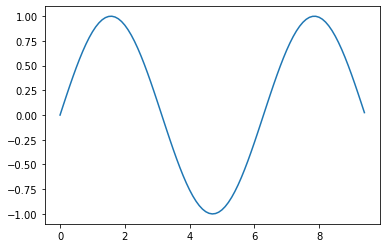

In [44]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

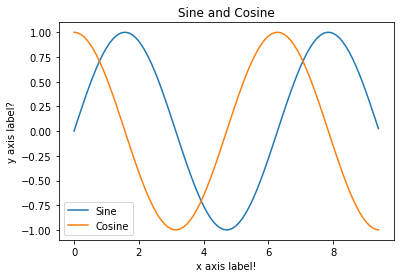

In [45]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label!')
plt.ylabel('y axis label?')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

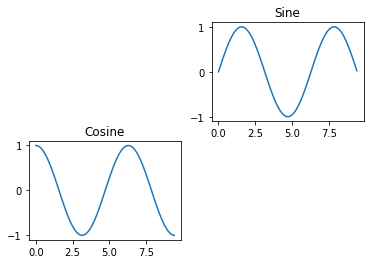

In [46]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Rhe position of the subplot described by one of Three integers (nrows, ncols, index)
plt.subplot(2, 2, 2)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')
plt.subplot(2, 2, 3)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## 3. Pillow (PIL)

Pillow is a Python Imaging Library (PIL), which adds support for opening, manipulating, and saving images.
The current version identifies and reads a large number of formats. 
Write support is intentionally restricted to the most commonly used interchange and presentation formats.

### Mount Google Drive & Files

In [47]:
from google.colab import drive
drive.mount('/content/drive') #구글 드라이브 연동

MessageError: ignored

Let's check the files in the Google Drive Directory (/content/drive/)

In [ ]:
!ls /content/drive/MyDrive/DL_Spring2022/

### open() and show()
Let's open a file and display it:

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/DL_Spring2022/shoe.jpg', 'r')
print(pil_im.size) # image size
imshow(np.asarray(pil_im))

### convert and save()
We can convert the image from jpg to png and save it:

In [ ]:
pil_im.save('/content/drive/MyDrive/DL_Spring2022/shoe.png')

### resize - thumbnail()
We can resize the image using thumbnail() method of Pillow:

In [ ]:
pil_im = Image.open('/content/drive/MyDrive/DL_Spring2022/shoe.jpg', 'r')
pil_im.thumbnail((300,300))
imshow(np.asarray(pil_im))

###  Coordinate system & Image Crop
The Pillow package uses the Cartesian pixel coordinate system. In later parts of this piece, we will use this concept, so it is paramount that you understand it. In this system:

* (0,0) is the upper left corner
* coordinates are passed as a tuple in the form (x,y)
* rectangles are represented as 4 tuples, the upper left corner is provided first. 

In [ ]:
pil_im = Image.open('/content/drive/MyDrive/DL_Spring2022/shoe.jpg')
box = (0, 100, 750, 500)
cropped_image = pil_im.crop(box)
imshow(np.asarray(cropped_image))

### Rotating images
Rotating an image is done via the rotate function of the Image class.

In [ ]:
rotated = cropped_image.rotate(180)
imshow(np.asarray(rotated))

### PIL image to NumPy array
Pillow also allows us to convert an image to a NumPy array. After converting an image to NumPy array we still can read it in using PIL. 

In [ ]:
import numpy as np
rotated_array = np.array(rotated)
print(rotated_array.shape)

imshow(rotated_array)

### Color transformations
We can switch an image from colored to black and white and vice versa. This is done via the convert function and passing the preferred color format

In [ ]:
from PIL import ImageOps
img = Image.fromarray(rotated_array, 'RGB')
gray_img = ImageOps.grayscale(img)
imshow(np.asarray(gray_img), cmap='Greys_r')

### Image enhancement
Pillow also comes with functions that enable us to perform image enhancement. This is a process that improves the original quality of an image. 

We start by importing the module that ships those functionalities.

In [ ]:
from PIL import ImageEnhance
enhancer = ImageEnhance.Sharpness(cropped_image)
enhancer.enhance(10.0)

Let’s take another example where we double the brightness of the image.

In [ ]:
enhancer = ImageEnhance.Contrast(cropped_image)
enhancer.enhance(2)

### Filters
Another super cool thing we can do with Pillow is to add filters to images. The first step is to import the ImageFilter module.

In [ ]:
from PIL import ImageFilter

cropped_image.filter(ImageFilter.BLUR)

In [ ]:
# CONTOUR
cropped_image.filter(ImageFilter.CONTOUR)

### Working with images sequences (GIFs) in PIL
We can also load image sequences such as GIF images. Let’s start by importing the image sequence module.

In [ ]:
import IPython
from IPython.display import Image
Image(open('/content/drive/MyDrive/DL_Spring2022/cat_gif.gif','rb').read())

In [ ]:
from PIL import ImageSequence
from PIL import Image

im = Image.open('/content/drive/MyDrive/DL_Spring2022/cat_gif.gif')

frame_num = 1
for frame in ImageSequence.Iterator(im):
    frame.save('/content/drive/MyDrive/DL_Spring2022/frame%d.png' % frame_num)
    frame_num = frame_num + 1
    if frame_num == 4:
        break